# Data Analysis of GACR

Here I am going to take a look at the data and find some important features which I can then use in my predictive model.

## Importing the neccessary packages

In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Loading in the prepared data from the previous Jupyter Notebook

In [20]:
train = pd.read_csv('prep_data.csv', index_col=0)

C:\Users\Nikhil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (3,50) have mixed types. Specify dtype option on import or set low_memory=False.



# Data Visualization

In [31]:
def graph_ready(groupby_variable):

    table = train.groupby(groupby_variable, as_index=True)["totals.transactionRevenue"].agg(["size", "count", "mean"])
    table.columns = ["count", "count of non-zero revenue", "mean"]
    table = table.sort_values(by="count", ascending=False)
    table = table.reset_index()
    
    return table

<BarContainer object of 3 artists>

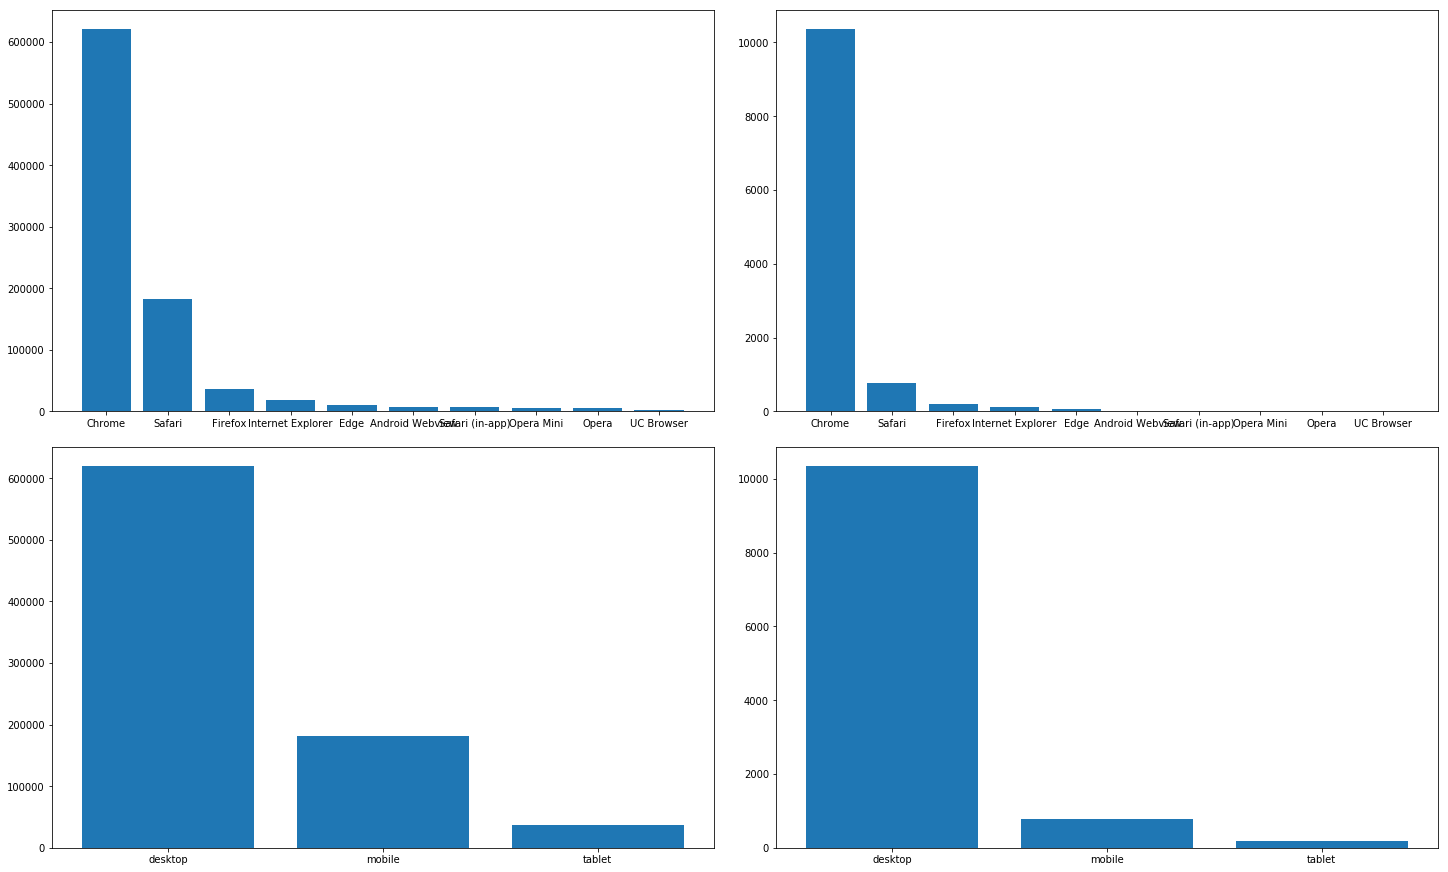

In [98]:
devicebrowser_table = graph_ready("device.browser")
devicetype_table = graph_ready("device.deviceCategory")


fig = plt.figure(constrained_layout=True, figsize=(20,12))
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec2[0, 0])
ax2 = fig.add_subplot(spec2[0, 1])
ax3 = fig.add_subplot(spec2[1, 0])
ax4 = fig.add_subplot(spec2[1, 1])

ax1.bar(devicebrowser_table["device.browser"].head(10), devicebrowser_table["count"].head(10))
ax2.bar(devicebrowser_table["device.browser"].head(10), devicebrowser_table["count of non-zero revenue"].head(10))
ax3.bar(devicetype_table["device.deviceCategory"].head(3), devicebrowser_table["count"].head(3))
ax4.bar(devicetype_table["device.deviceCategory"].head(3), devicebrowser_table["count of non-zero revenue"].head(3))


<BarContainer object of 20 artists>

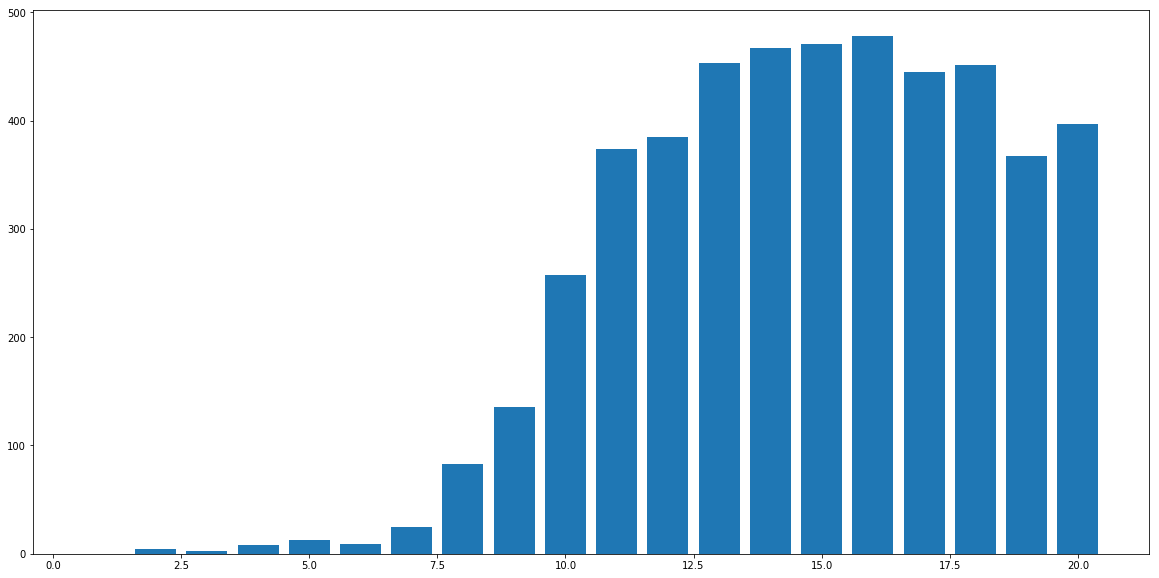

In [102]:
page_views = graph_ready("totals.pageviews")

plt.figure(figsize=(20,10))
plt.bar(page_views["totals.pageviews"].head(20), page_views["count of non-zero revenue"].head(20))

Above we can see that the total views feature has a strong correlation between transaction revenue for a particular customer.
Let's use this as a feature when making our model.